#  Introduction

Customer churn is one of the biggest challenges for telecom companies, as it directly affects both revenue and long-term growth. When customers leave — whether due to poor service experiences, attractive offers from competitors, or changes in their needs — it can be costly for a business.

Understanding why customers churn is the first step toward fixing the problem. By identifying the key factors that influence a customer’s decision to stay or leave, telecom providers can take targeted actions to improve satisfaction, build loyalty, and ultimately reduce churn.

In this project, I’ve combined Exploratory Data Analysis (EDA), feature engineering, and various machine learning models to predict whether a customer is likely to leave. The aim is not just to build an accurate prediction model, but also to uncover valuable insights that can help shape practical, data-driven retention strategies.

# Dataset Description

The dataset used is the Telco Customer Churn dataset, containing information about customers’ demographic details, account information, services subscribed, and churn status.

Key Details:

Rows: 7,043 customers

Columns: 21 features (both numerical and categorical)

Target Variable: Churn – whether the customer left the service (Yes/No)

Feature Overview:

Customer Demographics: gender, SeniorCitizen, Partner, Dependents

Account Information: tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

Services Subscribed: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

Target: Churn (Yes = customer churned, No = retained)

# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.size

147903

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors="coerce") 

In [8]:
df.dropna(how='any',inplace=True)

In [9]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Creating a Deep Copy of the Dataframe for performing EDA

In [10]:
df_new = df.copy()

# Exploratory Data Analysis

In [11]:
# Ensure visuals are clean
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (8,5)

1 . Overall Churn Rate

In [12]:
churn_rate = df_new['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 26.58%


Result :-  Churn Distribution: 26.6% of customers churned, 73.4% stayed.

2 . Pie Chart - Churn vs Non-Churn

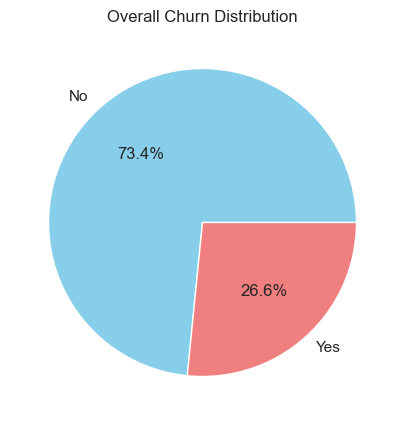

In [13]:
df_new['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Overall Churn Distribution')
plt.ylabel('')
plt.show()

3 . Churn Rate by Contract Type


 Churn Rate by Contract Type:
 Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


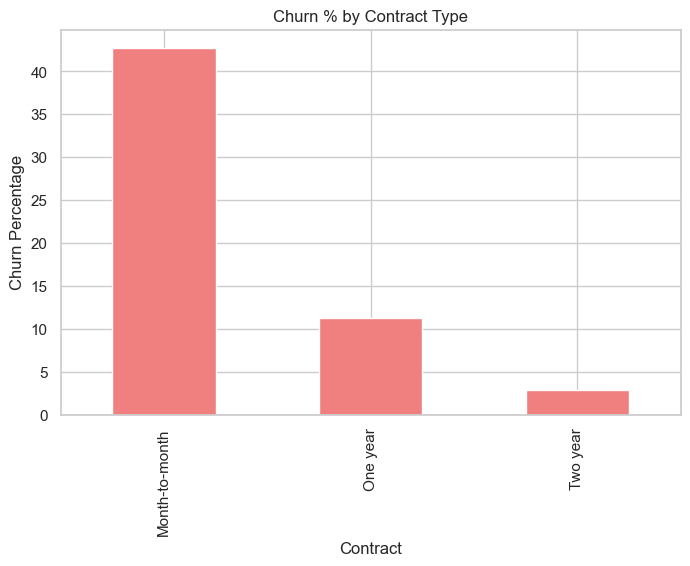

In [14]:
contract_churn = df_new.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("\n Churn Rate by Contract Type:\n", contract_churn)

contract_churn['Yes'].plot(kind='bar', color='lightcoral')
plt.title('Churn % by Contract Type')
plt.ylabel('Churn Percentage')
plt.show()

Result :- Month-to-month has the highest churn (42.7%), two-year the lowest (2.8%).

4 . Churn by Payment Method

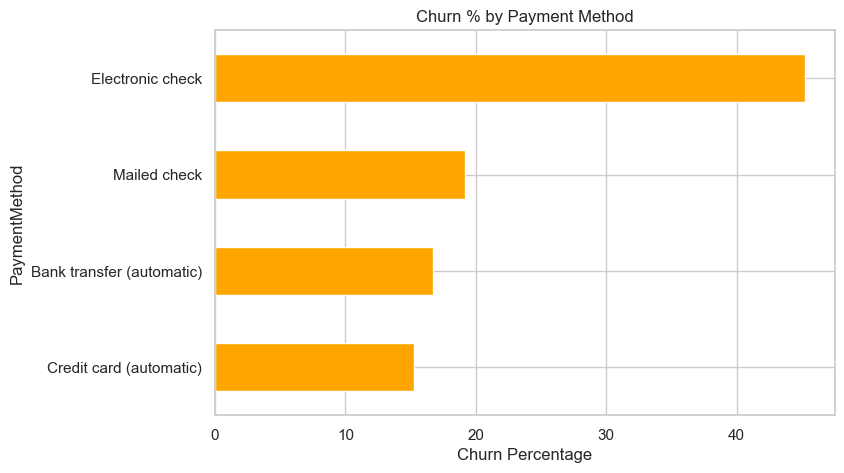

In [15]:
payment_churn = df_new.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
payment_churn['Yes'].sort_values().plot(kind='barh', color='orange')
plt.title('Churn % by Payment Method')
plt.xlabel('Churn Percentage')
plt.show()

Result :-  Electronic check users churn the most, Credit card auto the least.

5 .  Churn by Tenure Group

C:\Users\user\AppData\Local\Temp\ipykernel_114548\1244533281.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df_new.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100


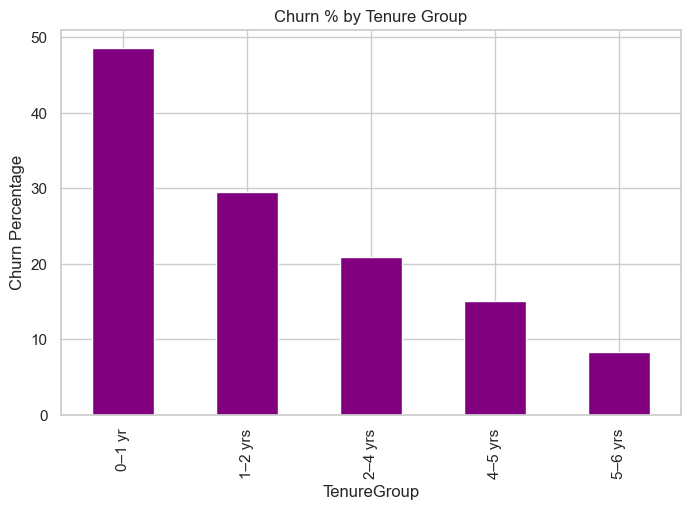

In [16]:
bins = [0, 12, 24, 48, 60, 72]
labels = ['0–1 yr', '1–2 yrs', '2–4 yrs', '4–5 yrs', '5–6 yrs']
df_new['TenureGroup'] = pd.cut(df_new['tenure'], bins=bins, labels=labels, right=False)

tenure_churn = df_new.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100
tenure_churn['Yes'].plot(kind='bar', color='purple')
plt.title('Churn % by Tenure Group')
plt.ylabel('Churn Percentage')
plt.show()

Result :- New customers (0–1 year) churn the most, 5–6 years churn the least.

6 . Services Impact on Churn

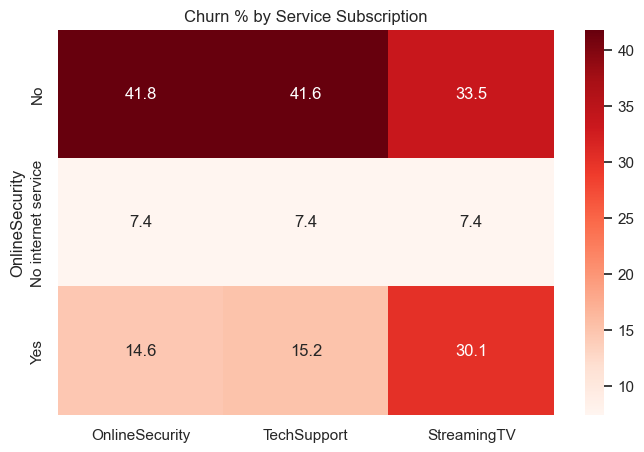

In [17]:
service_cols = ['OnlineSecurity', 'TechSupport', 'StreamingTV']
service_churn = pd.DataFrame()

for col in service_cols:
    service_churn[col] = df_new.groupby(col)['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100

sns.heatmap(service_churn, annot=True, fmt=".1f", cmap='Reds')
plt.title('Churn % by Service Subscription')
plt.show()

Result :-  Having OnlineSecurity or TechSupport reduces churn significantly.

# Feature Engineering

In [18]:
X = df.drop(['customerID','Churn'],axis=1)

In [19]:
Y = df['Churn'].values

In [20]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [21]:
Y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'],
      shape=(7032,), dtype=object)

In [22]:
# Convert Categorical Features To Numericals 
X = pd.get_dummies(X , columns= [ 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        ] , drop_first= True )

In [23]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True


In [25]:
dummy_cols = [col for col in X.columns if X[col].dtype == 'bool']
X[dummy_cols] = X[dummy_cols].astype(int)


In [26]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [27]:
# Splitting the data Into Training And Test
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.25)

In [28]:
len(X_test)

1758

In [29]:
len(X_train)

5274

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [31]:
X_train_sc

array([[-0.44048052, -0.91570971,  1.13126304, ..., -0.52483659,
         1.39748614, -0.55091709],
       [-0.44048052, -0.59036531,  0.82226022, ...,  1.90535496,
        -0.7155706 , -0.55091709],
       [ 2.27024793,  0.0603235 ,  1.46352414, ..., -0.52483659,
         1.39748614, -0.55091709],
       ...,
       [-0.44048052, -0.87504166, -1.17130636, ..., -0.52483659,
         1.39748614, -0.55091709],
       [ 2.27024793, -1.15971801,  0.46507954, ..., -0.52483659,
         1.39748614, -0.55091709],
       [-0.44048052, -1.24105412, -0.67291472, ..., -0.52483659,
         1.39748614, -0.55091709]], shape=(5274, 30))

In [32]:
X_test_sc

array([[-0.44048052, -1.24105412,  0.1809963 , ..., -0.52483659,
         1.39748614, -0.55091709],
       [-0.44048052, -1.15971801,  0.49996696, ..., -0.52483659,
         1.39748614, -0.55091709],
       [-0.44048052, -1.24105412, -0.52007461, ..., -0.52483659,
        -0.7155706 ,  1.81515517],
       ...,
       [-0.44048052,  0.30433181, -0.15126479, ..., -0.52483659,
        -0.7155706 ,  1.81515517],
       [-0.44048052, -0.83437361,  1.13126304, ..., -0.52483659,
        -0.7155706 , -0.55091709],
       [ 2.27024793,  1.19902892,  0.50162826, ...,  1.90535496,
        -0.7155706 , -0.55091709]], shape=(1758, 30))

# Model Building And Evaluation

### KNN - Classifier

In [33]:
# Call The KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier

# Initiating the Classifier
model = KNeighborsClassifier()

# passing the data to Classifier

model.fit(X_train_sc,Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
Y_pred = model.predict(X_test_sc)

In [35]:
Y_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'],
      shape=(1758,), dtype=object)

In [36]:
Y_train

array(['No', 'No', 'No', ..., 'No', 'Yes', 'Yes'],
      shape=(5274,), dtype=object)

In [37]:
# Classification Metrics  = to check how the model is behaving
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test,Y_pred)*100,2)

76.17

In [38]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          No       0.83      0.85      0.84      1294
         Yes       0.55      0.52      0.53       464

    accuracy                           0.76      1758
   macro avg       0.69      0.68      0.69      1758
weighted avg       0.76      0.76      0.76      1758



In [39]:
X_train.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6356,0,10,98.9,1064.95,1,0,0,1,0,0,...,0,1,0,1,1,0,1,0,1,0


### New Testing Data

In [40]:
df_new = [[0,2,87,178,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1]]
df_new_sc = sc.transform(df_new)
single = model.predict(df_new_sc)
print(single)

['Yes']


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
df_new = [[0,2,87,178,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1]]
df_new_sc = sc.transform(df_new)
single = model.predict_proba(df_new_sc)
print(single)

[[0.2 0.8]]


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Decesion Tree - Classifier

In [42]:
# Calling the Decesion Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initiating the Classifier
model_dt = DecisionTreeClassifier()

# passing the data to Classifier

model_dt.fit(X_train_sc,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [43]:
Y_pred_dt = model_dt.predict(X_test_sc)

In [44]:
# Classification Metrics  = to check how the model is behaving
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test,Y_pred_dt)*100,2)

73.44

In [45]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

          No       0.82      0.82      0.82      1294
         Yes       0.50      0.49      0.49       464

    accuracy                           0.73      1758
   macro avg       0.66      0.66      0.66      1758
weighted avg       0.73      0.73      0.73      1758



### Random Forest Classifier

In [46]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

# Initiating the Classifier
model_rf = RandomForestClassifier()

#Passing the data to Classifier 
model_rf.fit(X_train_sc,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
Y_pred_rf = model_rf.predict(X_test_sc)

In [48]:
# Classification Metrics  = to check how the model is behaving
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test,Y_pred_rf)*100,2)

79.18

In [49]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1294
         Yes       0.64      0.48      0.55       464

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



# Ensemble Learning -> Boosting

Types:-

Gradient Boosting

Extreme gradient Boosting (XGBoost)

AdaBoost

CatBoost

### Adaboost Classifier

In [50]:
# Calling the Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Initiating the Classifier
model_ada = AdaBoostClassifier(n_estimators=100)

#Passing the data to Classifier 
model_ada.fit(X_train_sc,Y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [51]:
Y_pred_ada = model_ada.predict(X_test_sc)

In [52]:
# Classification Metrics  = to check how the model is behaving
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test,Y_pred_ada)*100,2)

80.77

In [53]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_ada))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1294
         Yes       0.69      0.50      0.58       464

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



### XGboost Classifier

In [54]:
import xgboost as xgb

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)  # Converts ['No', 'Yes'] to [0, 1]

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_sc, Y_train_enc)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [56]:
Y_pred_xgb = model_xgb.predict(X_test_sc)

In [57]:
y_pred_str = le.inverse_transform(Y_pred_xgb)  # This converts [0, 1] to ['No', 'Yes']

In [58]:
# Classification Metrics  = to check how the model is behaving
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test,y_pred_str)*100,2)

78.56

In [59]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_str))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1294
         Yes       0.61      0.52      0.56       464

    accuracy                           0.79      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



### CatBoost Classifier

In [60]:
import catboost as cb

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train_e = le.fit_transform(Y_train)  # Converts ['No', 'Yes'] to [0, 1]

model_cb = cb.CatBoostClassifier()
model_cb.fit(X_train_sc, Y_train_e)

Learning rate set to 0.020955
0:	learn: 0.6801182	total: 132ms	remaining: 2m 11s
1:	learn: 0.6678198	total: 135ms	remaining: 1m 7s
2:	learn: 0.6547551	total: 139ms	remaining: 46.2s
3:	learn: 0.6419076	total: 143ms	remaining: 35.7s
4:	learn: 0.6305518	total: 147ms	remaining: 29.3s
5:	learn: 0.6207635	total: 151ms	remaining: 25s
6:	learn: 0.6106281	total: 155ms	remaining: 22s
7:	learn: 0.6009744	total: 159ms	remaining: 19.7s
8:	learn: 0.5927618	total: 163ms	remaining: 17.9s
9:	learn: 0.5841053	total: 166ms	remaining: 16.5s
10:	learn: 0.5748044	total: 170ms	remaining: 15.3s
11:	learn: 0.5675428	total: 174ms	remaining: 14.3s
12:	learn: 0.5597569	total: 178ms	remaining: 13.5s
13:	learn: 0.5528766	total: 182ms	remaining: 12.8s
14:	learn: 0.5455789	total: 187ms	remaining: 12.2s
15:	learn: 0.5394962	total: 190ms	remaining: 11.7s
16:	learn: 0.5332542	total: 194ms	remaining: 11.2s
17:	learn: 0.5278754	total: 198ms	remaining: 10.8s
18:	learn: 0.5233118	total: 203ms	remaining: 10.5s
19:	learn: 0.5

In [62]:
Y_pred_cb = model_cb.predict(X_test_sc)

In [63]:
y_pred_s = le.inverse_transform(Y_pred_cb)  # This converts [0, 1] to ['No', 'Yes']

In [64]:
# Classification Metrics  = to check how the model is behaving
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test,y_pred_s)*100,2)

79.24

In [65]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_s))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1294
         Yes       0.63      0.51      0.56       464

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



# Key Insights

Overall churn rate: ~26.6% of customers in the dataset have churned.

Contract type is a major churn driver:

Month-to-month customers show much higher churn compared to one-year and two-year contracts.

Two-year contract customers have the lowest churn.

Tenure matters: Customers with shorter service tenure are more likely to churn.

Accuracy across tested models:

KNN: 0.76

Decision Tree: 0.73

Random Forest: 0.79

AdaBoost: 0.81 (highest observed)

XGBoost: 0.79

CatBoost: 0.79

Interpretation: While AdaBoost achieved the highest accuracy, other ensemble models (Random Forest, XGBoost, CatBoost) performed similarly, suggesting stable predictive patterns.

# Best Predictive Model - AdaBoost Classifier

--> Overall Accuracy: 80.77% — strong performance for churn prediction.

--> Class Performance:

--> No Churn → Precision: 0.84 | Recall: 0.92
    → The model is excellent at correctly identifying customers who will stay (low false positives).

-->Yes Churn → Precision: 0.69 | Recall: 0.50
   → It’s moderately good at predicting churners but misses about half of actual churn cases (false negatives still significant).

-->Macro Average (balanced measure): Precision 0.76 | Recall 0.71 | F1 0.73 — showing moderate balance but room for improvement in recall for churners.

-->Interpretation: The model is better at identifying non-churners than churners. For a business, the bigger risk here is the false negatives — customers who will churn but are predicted to stay.

# Business Recommendations

1. Target month-to-month contract customers with special retention offers or incentives to switch to longer-term contracts.

2. Onboard & engage new customers early — especially in the first few months — to reduce early churn risk.

3. Monitor high-risk segments (short tenure, high monthly charges) with proactive customer service interventions.

4. Run pilot campaigns offering discounts or loyalty benefits to customers identified as at-risk by the model.

5. Track churn KPIs over time to measure the impact of interventions and adjust strategies accordingly.